In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats

In [4]:
#Read in the csv dataset
disasters_data = pd.read_csv('Data Sets/DisasterDeclarationsSummaries (1).csv')

In [11]:
#Show data set
disasters_data.head()

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,incidentBeginDate,incidentEndDate,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,hash,lastRefresh
0,DR-4-MI,4,MI,DR,1953-06-02T04:00:00.000Z,1953,Tornado,TORNADO,0,1,...,1953-06-02T04:00:00.000Z,1953-06-02T04:00:00.000Z,NaN,26,0,0,Statewide,53004,8c9dee13124e36a9dfe2eb74e33fafad,2019-07-26T18:49:32.240Z
1,DR-2-TX,2,TX,DR,1953-05-15T04:00:00.000Z,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,...,1953-05-15T04:00:00.000Z,1953-05-15T04:00:00.000Z,NaN,48,0,0,Statewide,53003,c5a1a4a1030d6730d9c562cdbe7c830f,2019-07-26T18:49:32.163Z
2,DR-9-TX,9,TX,DR,1953-06-19T04:00:00.000Z,1953,Flood,FLOOD,0,1,...,1953-06-19T04:00:00.000Z,1953-06-19T04:00:00.000Z,NaN,48,0,0,Statewide,53010,4485da27a9218458eb2d13a6c33a4c62,2019-07-26T18:49:32.164Z
3,DR-11-NH,11,NH,DR,1953-07-02T04:00:00.000Z,1953,Fire,FOREST FIRE,0,1,...,1953-07-02T04:00:00.000Z,1953-07-02T04:00:00.000Z,NaN,33,0,0,Statewide,53011,86a70820dbb80e585cc01e2ce502005c,2019-07-26T18:49:32.163Z
4,DR-6-MI,6,MI,DR,1953-06-09T04:00:00.000Z,1953,Tornado,TORNADO,0,1,...,1953-06-09T04:00:00.000Z,1953-06-09T04:00:00.000Z,NaN,26,0,0,Statewide,53007,d3ae03a5caa78ae1c8b6052e5e29a97d,2019-07-26T18:49:32.163Z


In [89]:
#Create a count of disasters by year using value_count and 
b = disasters_data['fyDeclared']
c = b.value_counts().to_frame()
d = c.rename(columns={'fyDeclared':'Disaster Count'})
disaster_count = d.reset_index().rename(columns={'index':'Year'})
disaster_count = disaster_count.sort_values(['Year']).reset_index().drop(['index'], axis=1)
disaster_count.head()

,Year,Disaster Count
0,1953,10
1,1954,14
2,1955,20
3,1956,18
4,1957,18


In [90]:
#Create Linear Regression Line
da_slope, da_int, da_r, da_p, da_std_err = stats.linregress(disaster_count['Year'], disaster_count['Disaster Count'])
da_fit = da_slope * disaster_count['Year'] + da_int

<IPython.core.display.Javascript object>


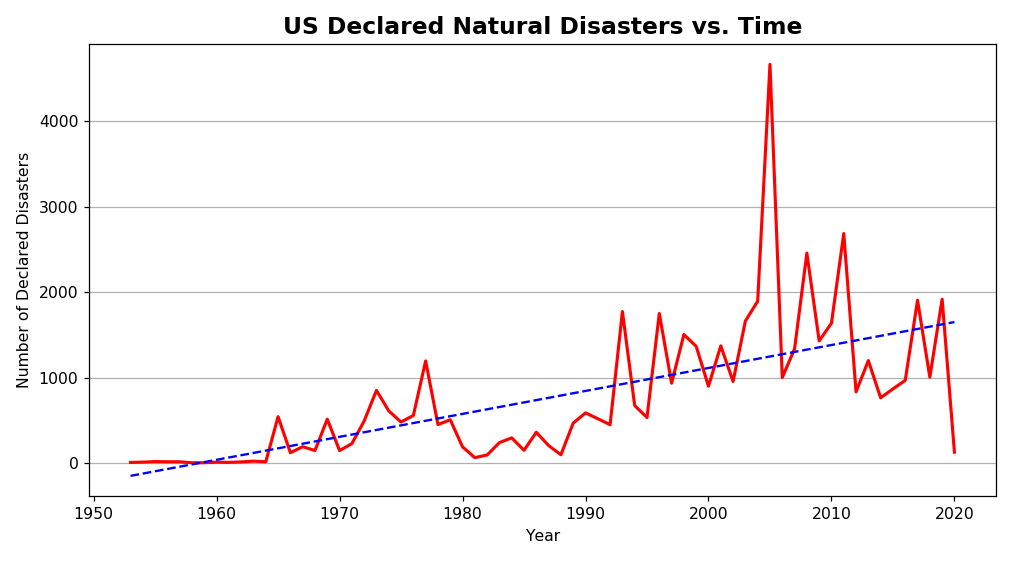

In [101]:
#Plot time series data with trend line
#Plot figure
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(disaster_count['Year'], disaster_count['Disaster Count'], linewidth=2, color='r')
ax.plot(disaster_count['Year'], da_fit, 'b--')
    

#Set line chart attributes
plt.title('US Declared Natural Disasters vs. Time', fontsize=15, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Declared Disasters')
plt.grid(axis='y')

#Visualize plot
plt.show()
plt.tight_layout()